In [54]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import ptitprince as pt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False).set_output(transform = "pandas")

#### Por lo que he leído acerca de los SVMs son adecuados para datasets con muchos features pero pocas columnas, el dataset original de este proyecto era de shape (20640, 10). Será cambiado por el que ven a continuación con shape (1460, 81)

In [43]:
df_housing = pd.read_csv("In/train.csv")
df_housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


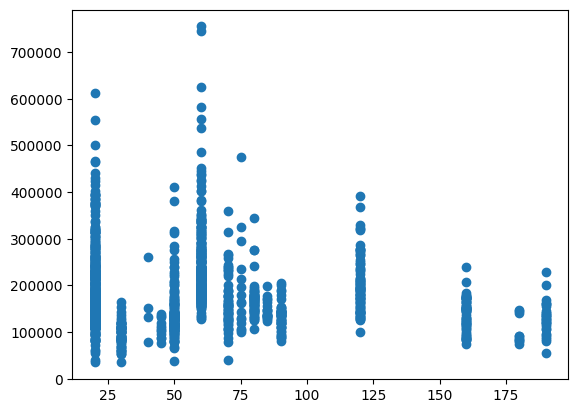

In [59]:
plt.scatter(x = "MSSubClass", y = "SalePrice", data = df_housing )

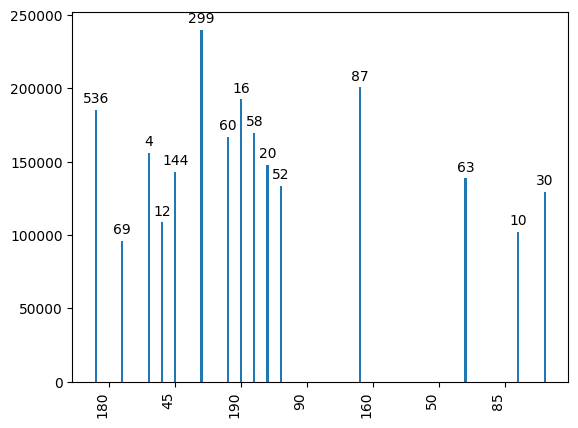

In [69]:
#Fue bueno para un proyecto pasado, menos categorías y en porcentaje de survived. Para esto terrible
def grafica_relacion_cat_obj(df, columna,target, order = False,): 

    df = df[[columna,target]]
        
    df_barras = df.groupby([columna], as_index = False).agg(["mean","count"])#.sort_index().plot.barh()
    df_barras.columns = list(map("".join, df_barras.columns.values))
    
    if order:
        df_barras = df_barras.reset_index(inplace = False).sort_values(by = target+"mean")
    else:
        df_barras.reset_index(inplace = True)
        
    fig, ax = plt.subplots()
    bars = ax.bar(df_barras[columna], df_barras[target+"mean"])

    for bar,count in zip(bars.patches, df_barras[target+"count"]):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset for better readability
        textcoords='offset points',
        ha='center', va='bottom')
 
    ax.set_xticklabels(df_barras[columna], rotation=90, ha='right')
 
    plt.show()
    
grafica_relacion_cat_obj(df_housing,"MSSubClass","SalePrice", order = True)

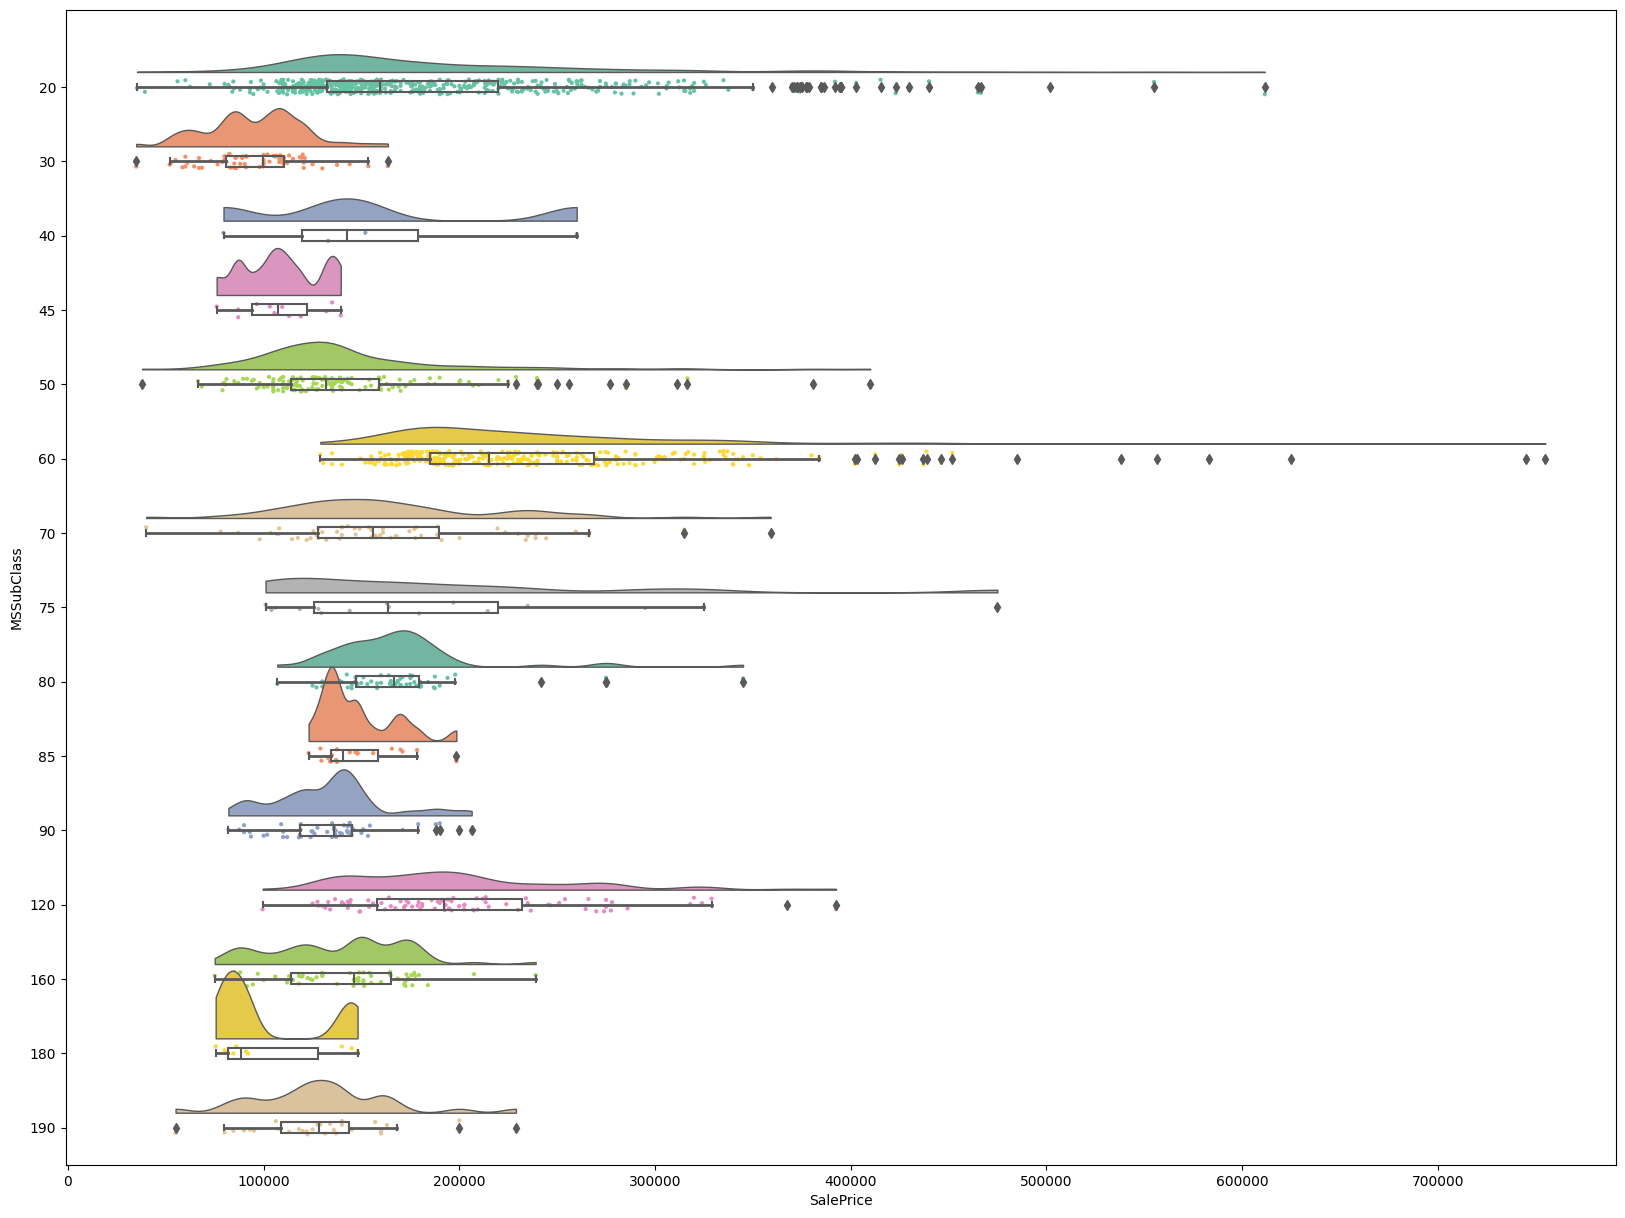

In [79]:
fig, ax = plt.subplots(figsize=(20, 15))

ax=pt.RainCloud(x = "MSSubClass", y = "SalePrice", data = df_housing,width_viol = 2,orient = "h")

In [49]:
[print(x)for x in df_housing.dtypes]
2+2

int64
int64
object
float64
int64
object
object
object
object
object
object
object
object
object
object
object
object
int64
int64
int64
int64
object
object
object
object
object
float64
object
object
object
object
object
object
object
int64
object
int64
int64
int64
object
object
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
object
int64
object
int64
object
object
float64
object
int64
int64
object
object
object
int64
int64
int64
int64
int64
int64
object
object
object
int64
int64
int64
object
object
int64


4